In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_val = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [4]:
train.shape

(1888, 22)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_id,1888.0,944.500000,545.162973,1.0,472.750000,944.500000,1416.250000,1888.000000
sender,1888.0,4.395657,3.277927,0.0,3.000000,3.000000,3.000000,15.000000
subject_len,1888.0,86.246292,30.143206,9.0,69.000000,83.000000,98.000000,265.000000
body_len,1888.0,14185.780191,7327.615307,23.0,9554.500000,12689.000000,17351.500000,44491.000000
mean_paragraph_len,1888.0,35.239407,28.139498,4.0,21.000000,29.000000,40.000000,286.000000
day_of_week,1888.0,2.828390,1.763193,0.0,1.000000,3.000000,4.000000,6.000000
is_weekend,1888.0,0.199682,0.399867,0.0,0.000000,0.000000,0.000000,1.000000
category,1888.0,9.949682,5.300719,0.0,6.000000,10.000000,15.000000,15.000000
product,1888.0,17.525424,12.369526,0.0,9.000000,12.000000,27.250000,43.000000
no_of_CTA,1888.0,4.222458,4.628348,0.0,2.000000,3.000000,5.000000,49.000000


In [6]:
train.isna().sum().any()

False

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [8]:
train.drop(['is_timer'], axis=1, inplace=True)

In [9]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [10]:
test.shape

(762, 21)

In [11]:
test.isna().sum().any()

False

In [12]:
test.drop(['is_timer'], axis=1, inplace=True)

In [13]:
train['sender'].value_counts()

3     1559
10     181
15      89
6       22
9       13
11       7
14       7
0        3
12       3
7        2
1        1
2        1
Name: sender, dtype: int64

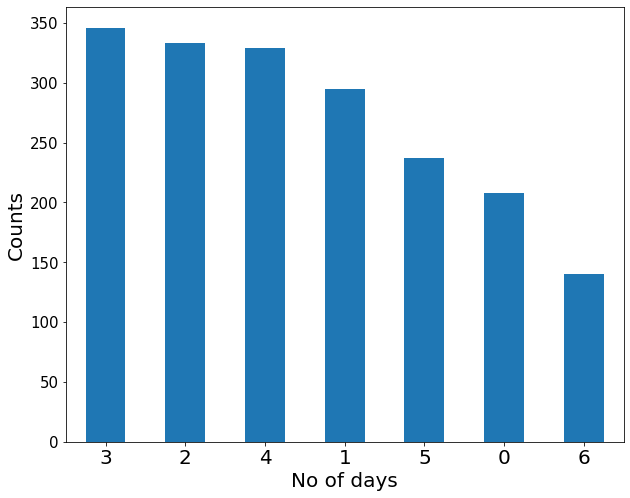

In [14]:
plt.figure(figsize=[10,8])
train['day_of_week'].value_counts(normalize=True)
train['day_of_week'].value_counts().plot.bar()
plt.xlabel('No of days', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 20, rotation = 0)
plt.show()

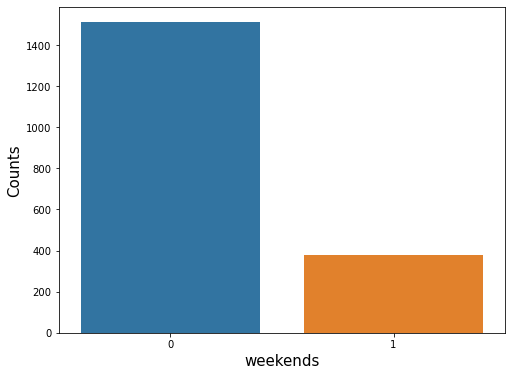

In [15]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'is_weekend', data=train)
plt.xlabel('weekends', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

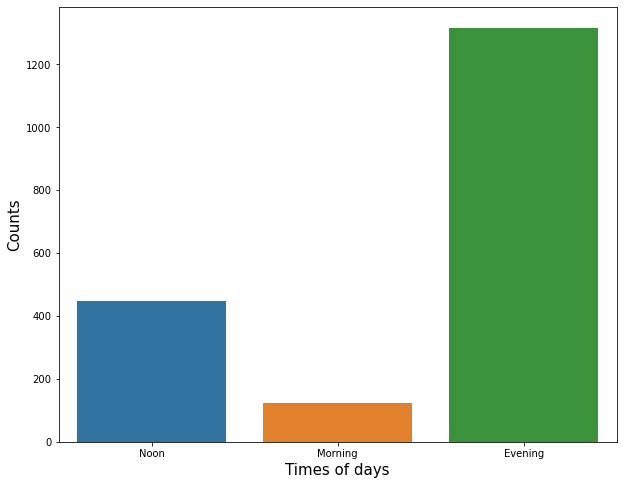

In [16]:
plt.figure(figsize=[10,8])
sns.countplot(x= 'times_of_day', data=train)
plt.xlabel('Times of days', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

In [17]:
train['category'].unique()

array([ 6,  2, 15,  1,  7, 10,  9, 12,  4,  3,  0, 13, 11, 14,  8,  5],
      dtype=int64)

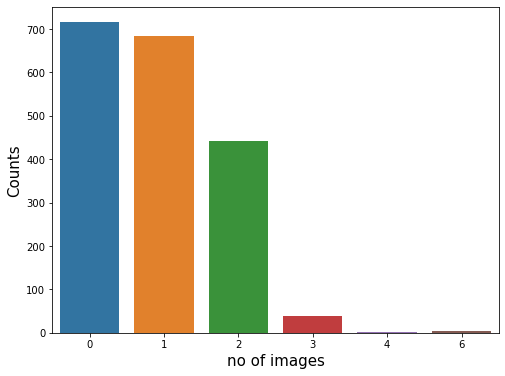

In [18]:
plt.figure(figsize=[8,6])
sns.countplot(x= 'is_image', data=train)
plt.xlabel('no of images', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

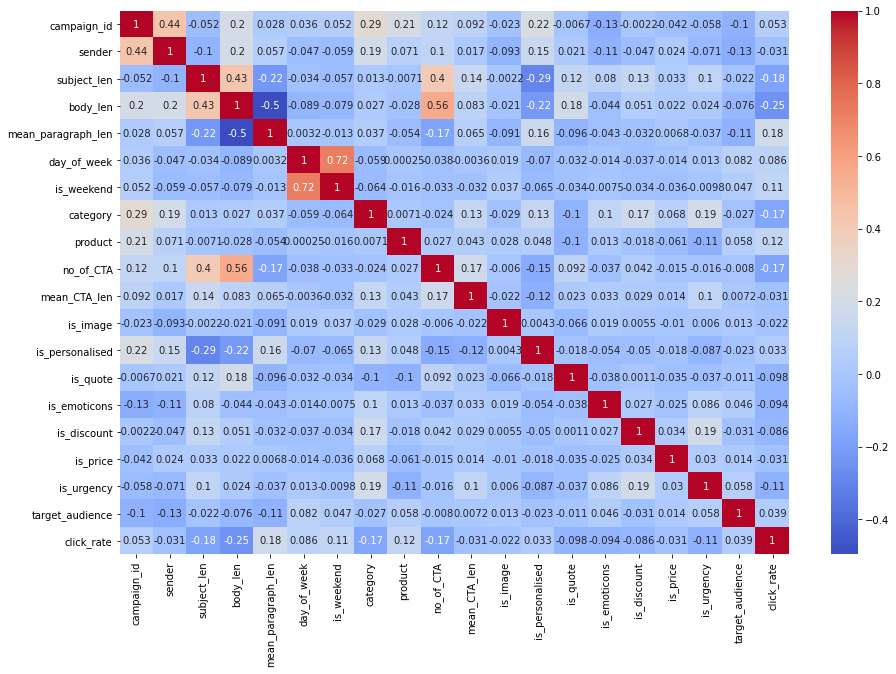

In [19]:
plt.figure(figsize=[15,10])
sns.heatmap(data=train.corr(), annot=True, cmap ='coolwarm')
plt.show()

In [20]:
data = pd.concat([train, test])
data.shape

(2650, 21)

In [21]:
data.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,31,0,0,1,0,0,0,0,14,0.142826


In [22]:
data.drop(['mean_paragraph_len'], axis=1, inplace= True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data['times_of_day'] = le.fit_transform(data['times_of_day'])

In [25]:
data.head()

,campaign_id,sender,subject_len,body_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,5,1,2,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,5,1,2,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,5,1,2,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [26]:
le.classes_

array(['Evening', 'Morning', 'Noon'], dtype=object)

In [27]:
data.drop(['campaign_id'], axis=1, inplace=True)

In [28]:
data.head()

,sender,subject_len,body_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,3,76,10439,5,1,2,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,3,54,2570,5,1,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,3,59,12801,5,1,2,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,3,74,11037,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,3,80,10011,5,1,2,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [29]:
data.columns

Index(['sender', 'subject_len', 'body_len', 'day_of_week', 'is_weekend',
       'times_of_day', 'category', 'product', 'no_of_CTA', 'mean_CTA_len',
       'is_image', 'is_personalised', 'is_quote', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [30]:
data['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6, 13,  5,  4,  8],
      dtype=int64)

In [31]:
data['day_of_week'].unique()

array([5, 4, 3, 2, 1, 0, 6], dtype=int64)

In [32]:
data['is_weekend'].unique()

array([1, 0], dtype=int64)

In [33]:
data['times_of_day'].unique()

array([2, 1, 0])

In [34]:
data['category'].unique()

array([ 6,  2, 15,  1,  7, 10,  9, 12,  4,  3,  0, 13, 11, 14,  8,  5],
      dtype=int64)

In [35]:
data['product'].unique()

array([26, 11,  9, 10,  5, 13, 12,  6,  1, 31, 27, 42, 34, 23, 19, 16, 22,
       28,  3,  7, 18, 20, 43,  0, 21, 39,  4,  2,  8, 41, 24, 36, 25, 35,
       40, 38, 14, 33, 37, 32, 17, 15, 29, 30, 44], dtype=int64)

In [36]:
data['no_of_CTA'].unique()

array([ 3,  0,  4,  2,  9,  8,  6,  5, 11,  1, 12,  7, 10, 15, 16, 13, 17,
       23, 14, 41, 44, 30, 27, 25, 33, 24, 20, 19, 18, 26, 32, 39, 37, 38,
       40, 31, 28, 34, 49, 36, 22, 42, 21], dtype=int64)

In [37]:
data['is_image'].unique()

array([0, 1, 2, 6, 3, 4], dtype=int64)

In [38]:
data['is_personalised'].unique()

array([0, 1], dtype=int64)

In [39]:
data['is_quote'].unique()

array([0, 1, 2, 3, 4, 6, 5], dtype=int64)

In [40]:
data['is_emoticons'].unique()

array([ 0,  2,  1,  3,  4,  6, 17], dtype=int64)

In [41]:
data['is_discount'].unique()

array([0, 1], dtype=int64)

In [42]:
data['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999,   999],
      dtype=int64)

In [43]:
data['is_urgency'].unique()

array([0, 1], dtype=int64)

In [44]:
data['target_audience'].unique()

array([14, 10, 16, 13,  6, 15, 12,  0,  4, 11,  1,  5,  7,  2,  3,  8,  9],
      dtype=int64)

In [45]:
columns = ['sender','day_of_week','is_weekend','times_of_day','category','product','no_of_CTA','is_image','is_personalised',
           'is_quote','is_emoticons','is_discount','is_price','is_urgency','target_audience']


data = pd.get_dummies(data= data, columns= columns, drop_first= True)

In [46]:
data.shape

(2650, 173)

In [47]:
data.head()

,subject_len,body_len,mean_CTA_len,click_rate,sender_1,sender_2,sender_3,sender_4,sender_5,sender_6,...,target_audience_7,target_audience_8,target_audience_9,target_audience_10,target_audience_11,target_audience_12,target_audience_13,target_audience_14,target_audience_15,target_audience_16
0,76,10439,29,0.103079,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,54,2570,22,0.700000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,59,12801,23,0.002769,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,74,11037,24,0.010868,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,80,10011,31,0.142826,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
train_df = data[ : 1888 :]
test_df = data[1888 : :]

In [49]:
train_df.head()

,subject_len,body_len,mean_CTA_len,click_rate,sender_1,sender_2,sender_3,sender_4,sender_5,sender_6,...,target_audience_7,target_audience_8,target_audience_9,target_audience_10,target_audience_11,target_audience_12,target_audience_13,target_audience_14,target_audience_15,target_audience_16
0,76,10439,29,0.103079,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,54,2570,22,0.700000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,59,12801,23,0.002769,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,74,11037,24,0.010868,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,80,10011,31,0.142826,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
test_df.drop(['click_rate'], axis=1, inplace = True)

In [51]:
x = train_df.drop(['click_rate'], axis= 1)
y = train_df['click_rate']

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state= 123)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1321, 172), (1321,), (567, 172), (567,))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
lr_ = LinearRegression()
lr_.fit(x_train, y_train)

LinearRegression()

In [55]:
lr_pred = lr_.predict(x_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_true= y_test, y_pred= lr_pred)))
print("Score : ", r2_score(y_true= y_test, y_pred= lr_pred))

RMSE :  0.08232914671624966
Score :  0.27248816610073967


In [56]:
lr_pred_ = lr_.predict(test_df)

In [57]:
Dataset01 = pd.DataFrame({'campaign_id' : test_val['campaign_id'],
                          'click_rate' : lr_pred_})

In [58]:
Dataset01.head()

,campaign_id,click_rate
0,1889,0.083243
1,1890,0.175427
2,1891,0.135027
3,1892,0.135734
4,1893,0.099281


In [59]:
Dataset01.to_csv('sample_submission01.csv', index= False)

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 500, max_depth= 15, n_jobs= -1, random_state=123)

In [61]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=500, n_jobs=-1,
                      random_state=123)

In [62]:
rfr_pred = rfr.predict(x_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_true= y_test, y_pred= rfr_pred)))
print("Score : ", r2_score(y_true= y_test, y_pred= rfr_pred))

RMSE :  0.07214326291025913
Score :  0.4413698195893232


In [63]:
rfr_pred_ = rfr.predict(test_df)

Dataset02 = pd.DataFrame({'campaign_id' : test_val['campaign_id'],
                          'click_rate' : rfr_pred_})

In [64]:
Dataset02.to_csv('sample_submission02.csv', index= False)

In [65]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 500, learning_rate = 0.01, max_depth= 15, random_state=123)

In [66]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
xgb_pred = xgb.predict(x_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_true= y_test, y_pred= xgb_pred)))
print("Score : ", r2_score(y_true= y_test, y_pred= xgb_pred))

RMSE :  0.07198425958404477
Score :  0.44382954124262797


In [68]:
xgb_pred_ = xgb.predict(test_df)

Dataset03 = pd.DataFrame({'campaign_id' : test_val['campaign_id'],
                          'click_rate' : xgb_pred_})

In [69]:
Dataset03.to_csv('sample_submission03.csv', index= False)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
model = Sequential()
model.add(Dense(units= 1024, activation = 'relu', input_dim =172))
model.add(Dense(units= 512, activation = 'relu'))
model.add(Dense(units= 128, activation = 'relu'))
model.add(Dense(units= 64, activation = 'relu'))
model.add(Dense(units= 1, activation = 'linear'))

In [73]:
model.compile(optimizer='adam', loss= tf.losses.mean_squared_error, metrics=['mse'])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              177152    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 775,937
Trainable params: 775,937
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), shuffle=True, batch_size= 32, verbose=123)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [79]:
ann_pred = model.predict(x_test)

print("RMSE :", np.sqrt(mean_squared_error(y_true= y_test, y_pred= ann_pred)))
print("Score :", r2_score(y_true= y_test, y_pred= ann_pred))

RMSE : 0.08932754615923359
Score : 0.14354678980237756


In [90]:
ann_pred_ = model.predict(test_df)

In [91]:
type(ann_pred_)

numpy.ndarray

In [96]:
ann_output = pd.DataFrame(ann_pred_)

In [98]:
Dataset04 = pd.concat([test_val['campaign_id'], ann_output], axis=1)
Dataset04.columns = test_val.columns

In [100]:
Dataset04.head()

,campaign_id,click_rate
0,1889,0.064948
1,1890,0.104636
2,1891,0.188561
3,1892,0.189130
4,1893,0.066745


In [101]:
Dataset04.to_csv('sample_submission04.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f